<a href="https://colab.research.google.com/github/harsh194/machine_learning/blob/main/Apply_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
new_directory = '/content/drive/MyDrive/Harsh/Advanced Learning Algorithms/Week 3'
os.chdir(new_directory)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from public_tests_a1 import *

tf.keras.backend.set_floatx('float64')
from assigment_utils import *

tf.autograph.set_verbosity(0)

In [5]:
X,y, x_ideal, y_ideal = gen_data(18,2,0.7)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 1)

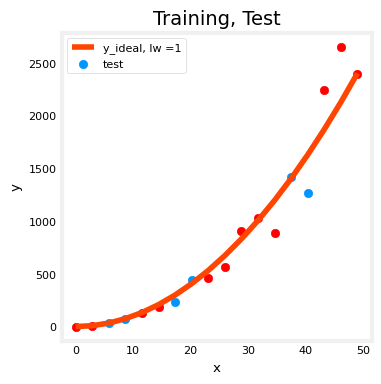

In [6]:
fig,ax = plt.subplots(1,1, figsize = (4,4))
ax.plot(x_ideal, y_ideal, "-", color = "orangered", label = "y_ideal, lw =1")
ax.set_title("Training, Test", fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red")
ax.scatter(X_test, y_test, color = dlc["dlblue"], label = "test")
ax.legend(loc = 'upper left')
plt.show()

In [7]:
def eval_mse(y, yhat):
    m = len(y)
    err = 0.0
    for i in range(m):
        err += (y[i] - yhat[i]) **2
    err/= 2*m
    return(err)

In [8]:
y_hat = np.array([2.4, 4.2])
y_tmp = np.array([2.3, 4.1])

test_eval_mse(eval_mse)

 All tests passed.


In [9]:
degree = 10
lmodel = lin_model(degree)
lmodel.fit(X_train, y_train)

yhat = lmodel.predict(X_train)
err_train = lmodel.mse(y_train, yhat)


In [10]:
err_train

58.007560352786506

In [11]:
yhat = lmodel.predict(X_test)
err_test = lmodel.mse(y_test, yhat)

In [12]:
err_test

171215.01148835945

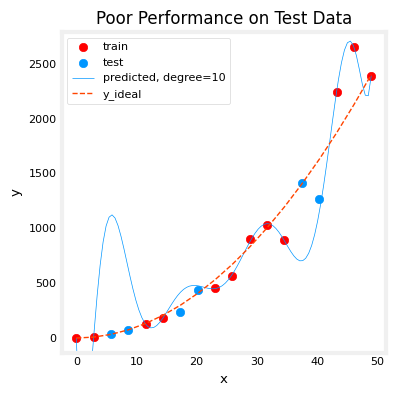

In [13]:
x = np.linspace(0, int(X.max()), 100)
y_pred = lmodel.predict(x).reshape(-1,1)

plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

In [14]:
X,y, x_ideal, y_ideal = gen_data(40,5,0.7)
X_train, X_, y_train, y_ = train_test_split(X,y, test_size = 0.40, random_state = 1)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_, test_size = 0.5, random_state = 1)
X_train.shape

(24,)

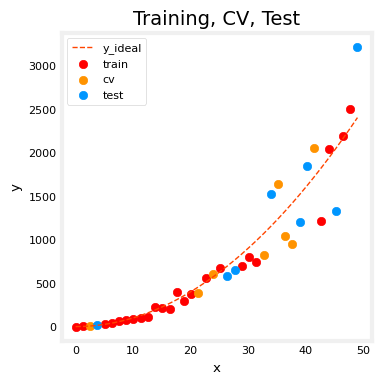

In [15]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label = "y_ideal", lw = 1)
ax.set_title("Training, CV, Test", fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red", label = "train")
ax.scatter(X_cv, y_cv, color = dlc["dlorange"], label = "cv")
ax.scatter(X_test, y_test, color = dlc["dlblue"], label = "test")
ax.legend(loc = 'upper left')
plt.show()

In [16]:
max_degree = 9
err_train = np.zeros(max_degree)
err_cv = np.zeros(max_degree)
x = np.linspace(0, int(X.max()), 100)
y_pred = np.zeros((100, max_degree))

for degree in range(max_degree):
    lmodel = lin_model(degree+1)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[degree] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[degree] = lmodel.mse(y_cv, yhat)
    y_pred[:, degree] = lmodel.predict(x)

optimal_degree = np.argmin(err_cv) + 1

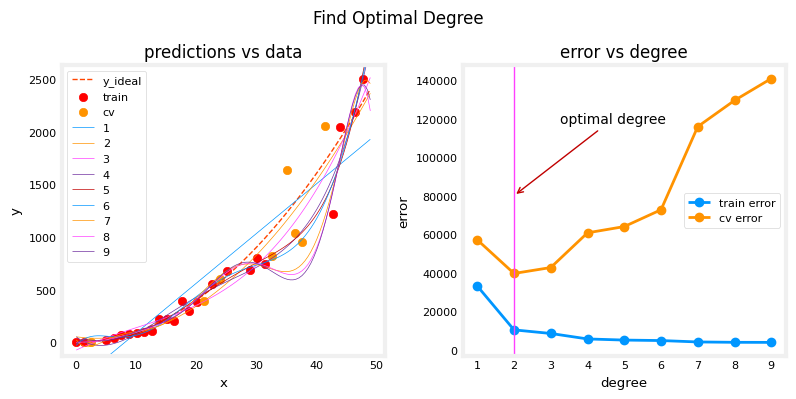

In [17]:
plt.close("all")
plt_optimal_degree(X_train, y_train, X_cv, y_cv, x, y_pred, x_ideal, y_ideal, err_train, err_cv, optimal_degree, max_degree)

In [18]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)
err_cv = np.zeros(num_steps)
x = np.linspace(0, int(X.max()), 100)
y_pred = np.zeros((100, num_steps))

for i in range(num_steps):
    lambda_ = lambda_range[i]
    lmodel = lin_model(degree, regularization = True, lambda_ = lambda_)
    lmodel.fit(X_train, y_train)
    yhat = lmodel.predict(X_train)
    err_train[i] = lmodel.mse(y_train, yhat)
    yhat = lmodel.predict(X_cv)
    err_cv[i] = lmodel.mse(y_cv, yhat)
    y_pred[:,i] = lmodel.predict(x)

optimal_reg_idx = np.argmin(err_cv)


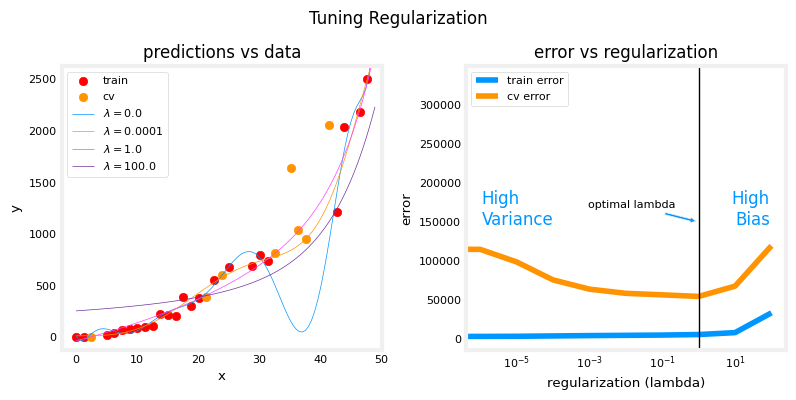

In [19]:
plt.close("all")
plt_tune_regularization(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, optimal_reg_idx, lambda_range)

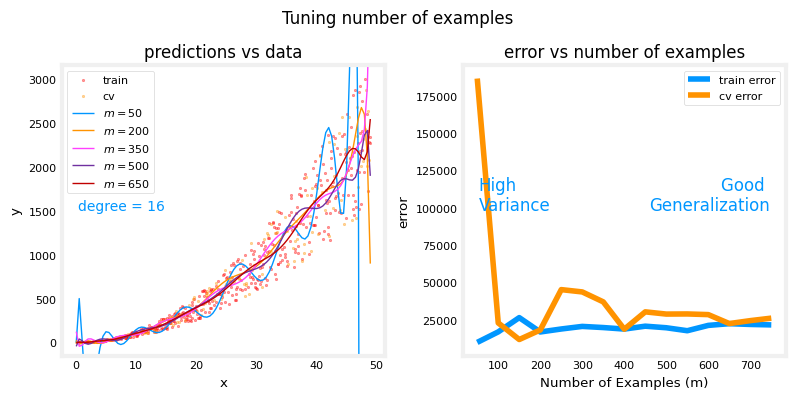

In [20]:
X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range,degree = tune_m()
plt_tune_m(X_train, y_train, X_cv, y_cv, x, y_pred, err_train, err_cv, m_range, degree)

In [21]:
X,y, centers, classes, std = gen_blobs()

X_train, X_, y_train, y_ = train_test_split(X,y, test_size = 0.50, random_state =1)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size = 0.20, random_state= 1)

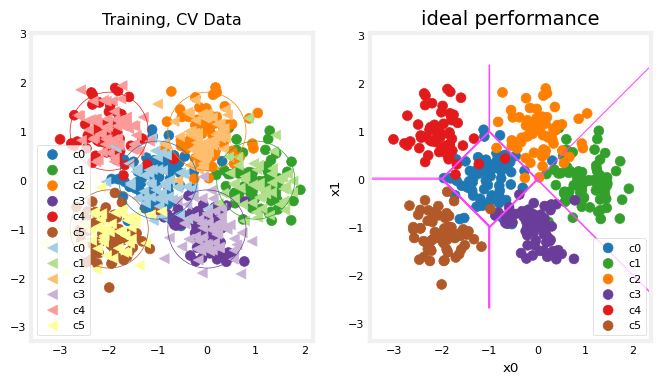

In [22]:
plt_train_eq_dist(X_train, y_train, classes, X_cv, y_cv, centers, std)

In [23]:
def eval_cat_err(y, yhat):
    m = len(y)
    incorrect = 0
    for i in range(m):
        if(yhat[i]!=y[i]):
            incorrect +=1

    cerr = incorrect/m
    return (cerr)

In [26]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.layers.Dense(120, activation = "relu"),
        tf.keras.layers.Dense(40, activation= "relu"),
        tf.keras.layers.Dense(6, activation = "linear")
    ], name = "Complex"
)

model.compile(
    loss = SparseCategoricalCrossentropy(from_logits= True),
    optimizer = tf.keras.optimizers.Adam(lr = 0.01),
)

In [ ]:
model.fit(
    X_train, y_train,
    epochs = 1000
)

1082/1082 [==============================] - 3s 3ms/step


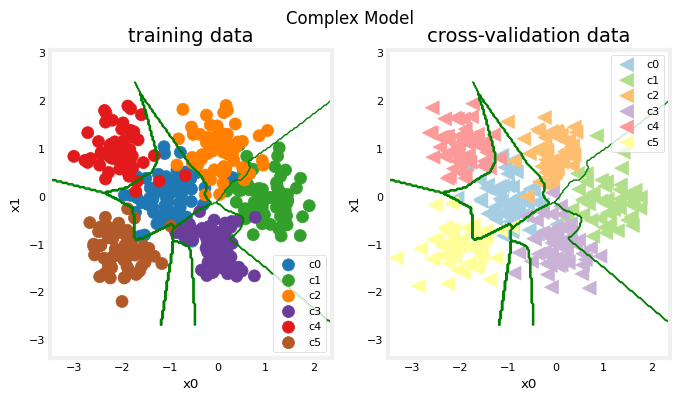

In [28]:
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv, suptitle="Complex Model")

In [29]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 2ms/step
categorization error, training, complex model: 0.050
categorization error, cv,       complex model: 0.106


In [30]:
tf.random.set_seed(1234)
model_s = Sequential(
    [
        tf.keras.layers.Dense(6, activation = "relu"),
        tf.keras.layers.Dense(6, activation = "linear")
    ], name = "Simple"
)

model_s.compile(
    loss = SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(lr = 0.01),
)

In [32]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

model_s.fit(
    X_train, y_train,
    epochs = 1000
)

Epoch 1/1000
13/13 [==============================] - 1s 2ms/step - loss: 1.8063
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.7781
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.7526
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.7287
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.7075
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.6858
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.6661
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.6466
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.6271
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.6073
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.5882
Epoch 12/1000
13/13 [==============================] - 0s 2ms/step - loss: 1.5692
Epoch 13/1000
13/13 [====

1082/1082 [==============================] - 2s 1ms/step


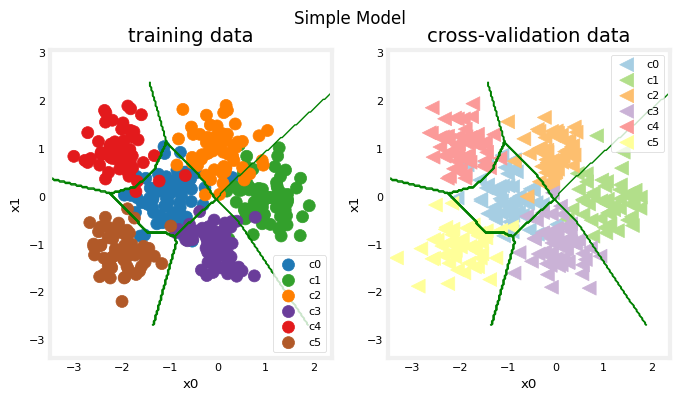

In [33]:
#make a model for plotting routines to call
model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model_s.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv, suptitle="Simple Model")

In [34]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

10/10 [==============================] - 0s 4ms/step
categorization error, training, simple model, 0.070, complex model: 0.050
categorization error, cv,       simple model, 0.066, complex model: 0.106


In [36]:
tf.random.set_seed(1234)
model_r = Sequential(
    [
        tf.keras.layers.Dense(120, activation = "relu", kernel_regularizer = tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(40, activation = "relu", kernel_regularizer= tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(6, activation = "linear")
    ], name = None
)
model_r.compile(
    loss = SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(lr = 0.01)
)

In [37]:
model_r.fit(
    X_train, y_train,
    epochs = 1000
)

Epoch 1/1000
13/13 [==============================] - 2s 4ms/step - loss: 7.5111
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 6.3549
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 5.3984
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 4.6093
Epoch 5/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.9645
Epoch 6/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.4356
Epoch 7/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.0071
Epoch 8/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.6542
Epoch 9/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.3665
Epoch 10/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.1310
Epoch 11/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.9410
Epoch 12/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.7866
Epoch 13/1000
13/13 [====

1082/1082 [==============================] - 2s 2ms/step


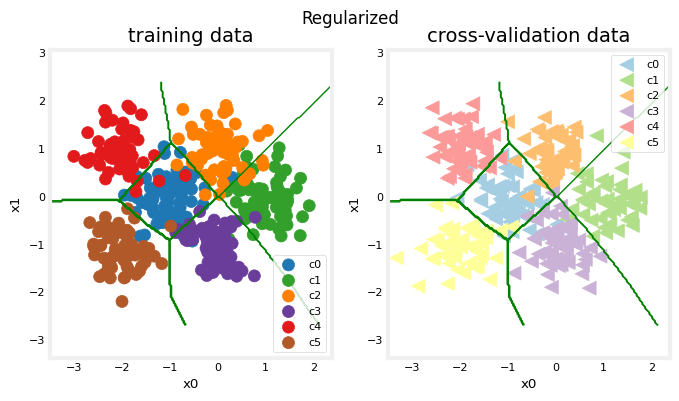

In [38]:
#make a model for plotting routines to call
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)

plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

In [40]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )


3/3 [==============================] - 0s 3ms/step
categorization error, training, regularized: 0.065, simple model, 0.070, complex model: 0.050


In [44]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
models = [None] * len(lambdas)

for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] = Sequential(
        [
            Dense(120, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation = 'linear')
        ]
    )
    models[i].compile(
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
        optimizer = tf.keras.optimizers.Adam(0.01),
    )

    models[i].fit(
        X_train, y_train,
        epochs = 1000
    )

    print(f"Finished lambda = {lambda_}")

Streaming output truncated to the last 5000 lines.
13/13 [==============================] - 0s 3ms/step - loss: 0.3553
Epoch 503/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3844
Epoch 504/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3654
Epoch 505/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3622
Epoch 506/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3761
Epoch 507/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3509
Epoch 508/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3356
Epoch 509/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3483
Epoch 510/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3444
Epoch 511/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3466
Epoch 512/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3577
Epoch 513/1000
13/13 [=============================

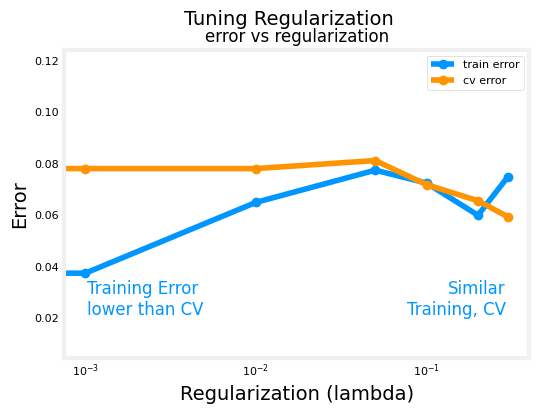

In [45]:
plot_iterate(lambdas, models, X_train, y_train, X_cv, y_cv)

3/3 [==============================] - 0s 3ms/step


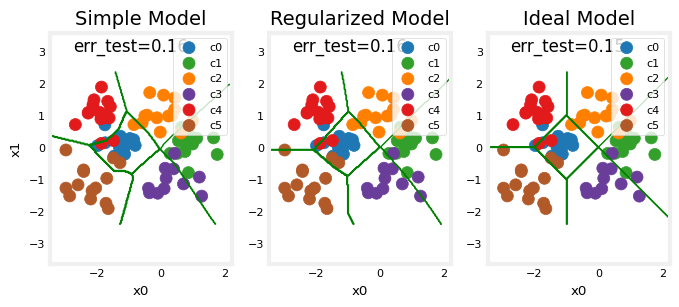

In [46]:
plt_compare(X_test, y_test, classes, model_predict_s, model_predict_r, centers)